# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [6]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
# EXERCICE 1 : Nettoyage des données
# INSERT CODE HERE
data = data.dropna()
data = data.drop(columns=["name"])
data["origin"] = data["origin"].map({"usa": 0, "japan": 1, "europe": 2})

# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [8]:
# Exercice 2
# INSERT CODE HERE
X = data.drop(columns=["mpg"])
y = data["mpg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [9]:
# Exercice 3
# INSERT CODE HERE
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [10]:
# Exercice 4
# INSERT CODE HERE
y_pred = regressor.predict(X_test)

# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [11]:
# Exercice 5
# INSERT CODE HERE
print("R2 Score (Train):", r2_score(y_train, regressor.predict(X_train)))
print("R2 Score (Test):", r2_score(y_test, y_pred))

R2 Score (Train): 1.0
R2 Score (Test): 0.7730125934140145


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [12]:
# Exercice 6
# INSERT CODE HERE
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": regressor.feature_importances_})
print(feature_importances.sort_values(by="Importance", ascending=False))


        Feature  Importance
1  displacement    0.632147
2    horsepower    0.173545
5    model_year    0.104095
3        weight    0.062887
4  acceleration    0.022141
6        origin    0.003184
0     cylinders    0.002000


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

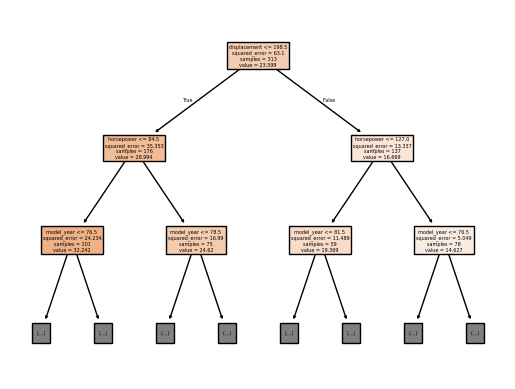

In [13]:
# EXERCICE 7
# INSERT CODE HERE
tree.plot_tree(regressor, feature_names=X.columns, max_depth=2, filled=True)
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [14]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [18]:
# Exercice 1
# INSERT CODE HERE
data["species"] = data["species"].map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
data["island"] = data["island"].map({"Torgersen": 0, "Biscoe": 1, "Dream": 2})

data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,NaN,NaN,39.1,18.7,181.0,3750.0,Male
1,NaN,NaN,39.5,17.4,186.0,3800.0,Female
2,NaN,NaN,40.3,18.0,195.0,3250.0,Female
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,46.8,14.3,215.0,4850.0,Female
341,NaN,NaN,50.4,15.7,222.0,5750.0,Male
342,NaN,NaN,45.2,14.8,212.0,5200.0,Female


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [19]:
# Exercice 2
# INSERT CODE HERE
X = data.drop(columns=["sex"])
y = data["sex"].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [20]:
# Exercice 3
# INSERT CODE HERE
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [21]:
# Exercice 4
# INSERT CODE HERE
y_pred = classifier.predict(X_test)


# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [22]:
# Exercice 5
# INSERT CODE HERE
print("Accuracy Score (Train):", accuracy_score(y_train, classifier.predict(X_train)))
print("Accuracy Score (Test):", accuracy_score(y_test, y_pred))

Accuracy Score (Train): 0.9963636363636363
Accuracy Score (Test): 0.8260869565217391


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [23]:
# Exercice 6
# INSERT CODE HERE
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": classifier.feature_importances_})
print(feature_importances.sort_values(by="Importance", ascending=False))


             Feature  Importance
3      bill_depth_mm    0.459825
5        body_mass_g    0.381948
2     bill_length_mm    0.106783
4  flipper_length_mm    0.051445
1             island    0.000000
0            species    0.000000


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

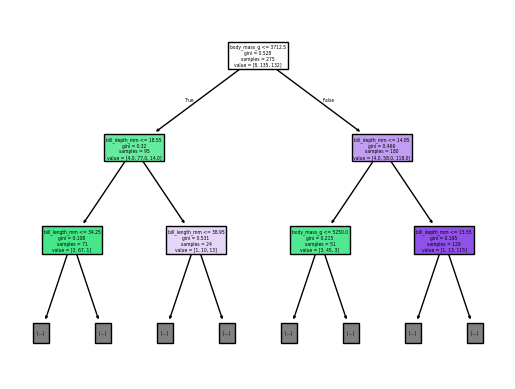

In [24]:
# Exercice 7
# INSERT CODE HERE
tree.plot_tree(classifier, feature_names=X.columns, max_depth=2, filled=True)
plt.show()

# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [25]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []

for i in range(1, 11):
    model = tree.DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    list_of_accuracies_train.append(accuracy_score(y_train, model.predict(X_train)))
    list_of_accuracies_test.append(accuracy_score(y_test, model.predict(X_test)))

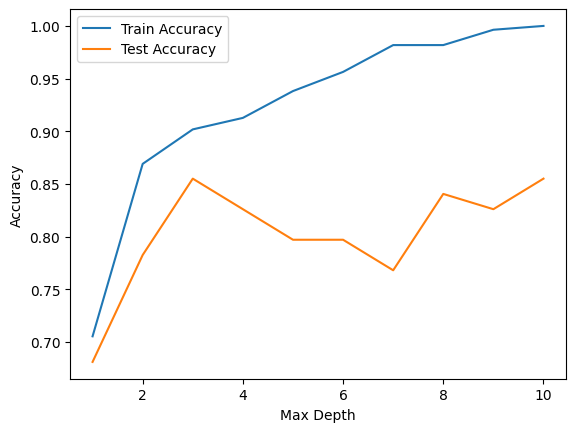

In [26]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE
plt.plot(range(1, 11), list_of_accuracies_train, label='Train Accuracy')
plt.plot(range(1, 11), list_of_accuracies_test, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

